In [ ]:
# Download and load dataset
!wget https://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
import pandas as pd
import gzip
import json

def load_data(filepath):
    with gzip.open(filepath, 'r') as f:
        data = [json.loads(line) for line in f]
    return pd.DataFrame(data)

df = load_data('reviews_Electronics_5.json.gz')


--2024-12-03 19:03:04--  https://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495854086 (473M) [application/x-gzip]
Saving to: ‘reviews_Electronics_5.json.gz’

reviews_Electronics 100%[===================>] 472.88M  28.2MB/s    in 13s     

2024-12-03 19:03:18 (35.3 MB/s) - ‘reviews_Electronics_5.json.gz’ saved [495854086/495854086]



In [ ]:
# Data Preprocessing
import numpy as np
import re

# Handle missing and duplicate values
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, list)).any():
        df[col] = df[col].astype(str)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Clean review text
def clean_text(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

df['reviewText'] = df['reviewText'].apply(clean_text)



In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an OTR o...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]",Im a professional OTR truck driver and I bough...,1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]",Well what can I say Ive had this unit in my t...,3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]",Not going to write a long review even thought ...,2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",Ive had mine for a year and heres what we got ...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664458 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   reviewerID      1664458 non-null  object 
 1   asin            1664458 non-null  object 
 2   reviewerName    1664458 non-null  object 
 3   helpful         1664458 non-null  object 
 4   reviewText      1664458 non-null  object 
 5   overall         1664458 non-null  float64
 6   summary         1664458 non-null  object 
 7   unixReviewTime  1664458 non-null  int64  
 8   reviewTime      1664458 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 127.0+ MB


In [ ]:
# reviewTime foremat to m d y
df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce', format='%m %d, %Y')

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an OTR o...,5.0,Gotta have GPS!,1370131200,2013-06-02
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]",Im a professional OTR truck driver and I bough...,1.0,Very Disappointed,1290643200,2010-11-25
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]",Well what can I say Ive had this unit in my t...,3.0,1st impression,1283990400,2010-09-09
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]",Not going to write a long review even thought ...,2.0,"Great grafics, POOR GPS",1290556800,2010-11-24
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",Ive had mine for a year and heres what we got ...,1.0,"Major issues, only excuses for support",1317254400,2011-09-29


In [ ]:
# Get year
df['reviewYear'] = df['reviewTime'].dt.year

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewYear
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an OTR o...,5.0,Gotta have GPS!,1370131200,2013-06-02,2013
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]",Im a professional OTR truck driver and I bough...,1.0,Very Disappointed,1290643200,2010-11-25,2010
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]",Well what can I say Ive had this unit in my t...,3.0,1st impression,1283990400,2010-09-09,2010
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]",Not going to write a long review even thought ...,2.0,"Great grafics, POOR GPS",1290556800,2010-11-24,2010
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",Ive had mine for a year and heres what we got ...,1.0,"Major issues, only excuses for support",1317254400,2011-09-29,2011


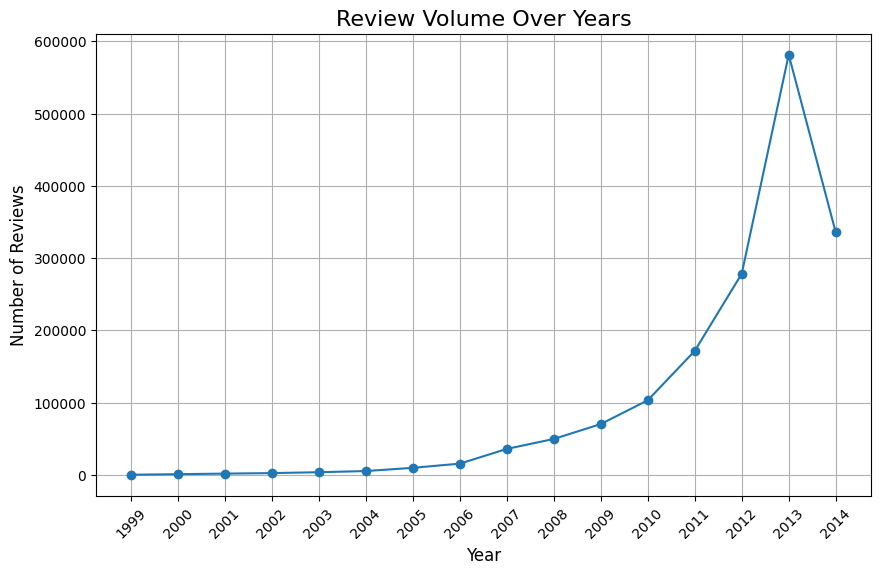

In [ ]:
# Data Exploration and Visualization
import matplotlib.pyplot as plt
import plotly.express as px

# Group reviews by year
review_trend_year = df.groupby('reviewYear').size()

# Visualize using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(review_trend_year.index, review_trend_year.values, marker='o')
plt.title('Review Volume Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(True)
plt.xticks(review_trend_year.index, rotation=45)
plt.show()




In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357286 sha256=a23569a44099c20873a90cf684b458603dadc712a519b27bb44d9f1f42fa2274
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import gc

# Process data in batches to avoid high memory usage
def preprocess_in_batches(dataframe, batch_size=50000):
    processed_batches = []
    for i in range(0, len(dataframe), batch_size):
        batch = dataframe.iloc[i:i+batch_size]
        batch['reviewText'] = batch['reviewText'].fillna('')
        processed = batch['reviewText'].map(simple_preprocess)
        processed_batches.extend(processed)
        del batch  # Free memory of intermediate variable
        gc.collect()  # Trigger garbage collection
    return processed_batches


In [ ]:
import pandas as pd
import gzip
import json
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import gc

# Load dataset from a gzipped JSON file
def load_data(filepath, n=None):
    with gzip.open(filepath, 'r') as f:
        data = [json.loads(line) for line in (f if n is None else list(f)[:n])]
    return pd.DataFrame(data)

# Filter and clean data: select reviews with ratings >= 4 and text length > 50
def filter_and_clean_data(df):
    df['reviewText'] = df['reviewText'].fillna('')
    filtered_df = df[(df['overall'] >= 4) & (df['reviewText'].str.len() > 50)]
    filtered_df['processedText'] = filtered_df['reviewText'].apply(simple_preprocess)
    return filtered_df[['asin', 'processedText']]  # Keep only ASIN and processed text

# Process data in batches to handle large files efficiently
def preprocess_in_batches(filepath, batch_size=100000):
    processed_texts, asins = [], []
    with gzip.open(filepath, 'r') as f:
        for chunk in pd.read_json(f, lines=True, chunksize=batch_size):
            filtered_chunk = filter_and_clean_data(chunk)
            processed_texts.extend(filtered_chunk['processedText'])
            asins.extend(filtered_chunk['asin'])
            del chunk, filtered_chunk
            gc.collect()  # Free memory
    return processed_texts, asins

# Train Word2Vec model
def train_word2vec(sentences, vector_size=50, window=5, min_count=5):
    return Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=4, sg=1, hs=0, negative=10)

# Generate content-based recommendations using Word2Vec
def recommend_content_based(asin, asins, model, n=5):
    if asin in model.wv:  # Check if the product exists in the model vocabulary
        similarities = model.wv.similar_by_vector(model.wv[asin], topn=n + 1)  # Find similar items
        return [item[0] for item in similarities if item[0] in asins and item[0] != asin][:n]
    return []

# Download dataset again for colab file loose
!wget https://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
filepath = 'reviews_Electronics_5.json.gz'

# Process dataset and extract relevant information
processed_texts, asins = preprocess_in_batches(filepath, batch_size=100000)

# Train Word2Vec model on processed data
word2vec_model = train_word2vec(processed_texts)

# Test recommendation for a specific product
example_asin = 'B00004T8R2'  # Example product ID
recommendations = recommend_content_based(example_asin, asins, word2vec_model)
print(f"Recommendations for {example_asin}: {recommendations}")



--2024-12-03 19:14:14--  https://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495854086 (473M) [application/x-gzip]
Saving to: ‘reviews_Electronics_5.json.gz.1’

reviews_Electronics 100%[===================>] 472.88M  43.6MB/s    in 11s     

2024-12-03 19:14:25 (41.2 MB/s) - ‘reviews_Electronics_5.json.gz.1’ saved [495854086/495854086]



<ipython-input-2-33a358305ac2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['processedText'] = filtered_df['reviewText'].apply(simple_preprocess)
<ipython-input-2-33a358305ac2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['processedText'] = filtered_df['reviewText'].apply(simple_preprocess)
<ipython-input-2-33a358305ac2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

Recommendations for B00004T8R2: []


In [ ]:
!pip install tqdm scikit-surprise gensim

In [ ]:
import pandas as pd
import gzip
import json
import gc
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from tqdm import tqdm
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

# Function to load data
def load_data(filepath, n=None):
    with gzip.open(filepath, 'r') as f:
        data = [json.loads(line) for line in (f if n is None else list(f)[:n])]
    return pd.DataFrame(data)

# Data preprocessing and cleaning in batches
def preprocess_in_batches(filepath, batch_size=100000):
    processed_texts = []
    asins = []
    reviewer_ids = []
    overall_scores = []
    with gzip.open(filepath, 'r') as f:
        total_lines = sum(1 for _ in f)
        f.seek(0)  # Reset file pointer
        for chunk in tqdm(pd.read_json(f, lines=True, chunksize=batch_size), total=total_lines // batch_size, desc="Processing Batches"):
            chunk['reviewText'] = chunk['reviewText'].fillna('')
            filtered_chunk = chunk[(chunk['overall'] >= 4) & (chunk['reviewText'].str.len() > 50)]
            filtered_chunk.loc[:, 'processedText'] = filtered_chunk['reviewText'].map(simple_preprocess)
            processed_texts.extend(filtered_chunk['processedText'])
            asins.extend(filtered_chunk['asin'])
            reviewer_ids.extend(filtered_chunk['reviewerID'])
            overall_scores.extend(filtered_chunk['overall'])
            del chunk, filtered_chunk  # Free up memory
            gc.collect()  # Trigger garbage collection
    return processed_texts, asins, reviewer_ids, overall_scores

# Word2Vec model training
def train_word2vec(sentences, vector_size=50, window=5, min_count=5):
    word2vec_model = Word2Vec(
        sentences=sentences,
        vector_size=vector_size,
        window=window,
        min_count=min_count,
        workers=4,
        sg=1,  # Skip-Gram model
        epochs=10
    )
    return word2vec_model

# Download and load dataset
!wget https://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
filepath = 'reviews_Electronics_5.json.gz'

# Data preprocessing
print("Processing dataset...")
processed_texts, asins, reviewer_ids, overall_scores = preprocess_in_batches(filepath, batch_size=100000)

# Build a complete DataFrame
df = pd.DataFrame({
    'asin': asins,
    'reviewerID': reviewer_ids,
    'overall': overall_scores,
    'processedText': processed_texts
})

# Train Word2Vec model
print("Training Word2Vec model...")
word2vec_model = train_word2vec(processed_texts)

# Collaborative filtering recommendation
print("Loading dataset for collaborative filtering...")
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

print("Training collaborative filtering model...")
svd_model = SVD()
svd_model.fit(trainset)

# Test recommendation system
def recommend_combined(user_id, asin, model, n=5):
    content_based = recommend_content_based(asin, asins, model, n=n // 2)  # Content-based recommendation
    collaborative = recommend_collaborative(user_id, n=n // 2)  # Collaborative filtering
    return list(set(content_based + collaborative))[:n]

print("Recommendations ready!")



--2024-12-04 03:54:00--  https://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495854086 (473M) [application/x-gzip]
Saving to: ‘reviews_Electronics_5.json.gz.1’

reviews_Electronics 100%[===================>] 472.88M  34.6MB/s    in 15s     

2024-12-04 03:54:15 (32.2 MB/s) - ‘reviews_Electronics_5.json.gz.1’ saved [495854086/495854086]

Processing dataset...


Processing Batches:   0%|          | 0/16 [00:00<?, ?it/s]<ipython-input-13-20400d222228>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_chunk.loc[:, 'processedText'] = filtered_chunk['reviewText'].map(simple_preprocess)
Processing Batches:   6%|▋         | 1/16 [00:16<04:03, 16.21s/it]<ipython-input-13-20400d222228>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_chunk.loc[:, 'processedText'] = filtered_chunk['reviewText'].map(simple_preprocess)
Processing Batches:  12%|█▎        | 2

KeyboardInterrupt: 

In [ ]:
import random

# Content-based recommendation
def recommend_content_based(asin, asins, model, n=5):
    """
    Recommend products based on content similarity.
    :param asin: Product ID
    :param asins: All product IDs
    :param model: Trained Word2Vec model
    :param n: Number of recommendations
    """
    if asin in model.wv:
        product_vector = model.wv[asin]
        similarities = model.wv.similar_by_vector(product_vector, topn=n + 1)
        recommendations = [item[0] for item in similarities if item[0] in asins and item[0] != asin][:n]
        return recommendations
    else:
        return []

# Collaborative filtering recommendation
def recommend_collaborative(user_id, n=5):
    """
    Recommend products using collaborative filtering.
    :param user_id: User ID
    :param n: Number of recommendations
    """
    all_products = df['asin'].unique()
    predictions = [svd_model.predict(user_id, product) for product in all_products]
    predictions.sort(key=lambda x: x.est, reverse=True)
    return [pred.iid for pred in predictions[:n]]

# Randomly select users and products for testing
def get_random_user_and_product(df, num_samples=5):
    """
    Randomly select users and products from the dataset.
    :param df: Dataset
    :param num_samples: Number of samples to select
    """
    random_users = random.sample(df['reviewerID'].unique().tolist(), num_samples)
    random_products = random.sample(df['asin'].unique().tolist(), num_samples)
    return random_users, random_products

# Select random users and products
random_users, random_products = get_random_user_and_product(df, num_samples=5)

# Test the recommendation system
for user, product in zip(random_users, random_products):
    print(f"\nTesting Recommendations for User: {user} and Product: {product}")

    # Test content-based recommendations
    content_recommendations = recommend_content_based(product, asins, word2vec_model)
    print(f"Content-based Recommendations for Product {product}: {content_recommendations}")

    # Test collaborative filtering recommendations
    collaborative_recommendations = recommend_collaborative(user)
    print(f"Collaborative Recommendations for User {user}: {collaborative_recommendations}")

    # Test combined recommendations
    combined_recommendations = recommend_combined(user, product, word2vec_model)
    print(f"Combined Recommendations for User {user} and Product {product}: {combined_recommendations}")



Testing Recommendations for User: A2VY96V3OS0WPN and Product: B0093YA7D4
Content-based Recommendations for Product B0093YA7D4: []
Collaborative Recommendations for User A2VY96V3OS0WPN: ['B0000AOWXO', 'B0026JO05E', 'B002BG0SO4', 'B004X1SFTA', 'B007G96YAS']
Combined Recommendations for User A2VY96V3OS0WPN and Product B0093YA7D4: ['B0026JO05E', 'B0000AOWXO']

Testing Recommendations for User: A1Z26DHXWKKDLX and Product: B00108HEKK
Content-based Recommendations for Product B00108HEKK: []
Collaborative Recommendations for User A1Z26DHXWKKDLX: ['B00000J1F3', 'B00000J1UQ', 'B00000J1UY', 'B00000J3UJ', 'B00000JCTO']
Combined Recommendations for User A1Z26DHXWKKDLX and Product B00108HEKK: ['B00000J1UQ', 'B00000J1F3']

Testing Recommendations for User: A2D1YUH1LANLYA and Product: B0009A2LP8
Content-based Recommendations for Product B0009A2LP8: []
Collaborative Recommendations for User A2D1YUH1LANLYA: ['1400501466', 'B000001OMA', 'B000001OMT', 'B00000J1F3', 'B00000J1V3']
Combined Recommendations 

In [ ]:
# Save Word2Vec model
word2vec_model.save("word2vec_model.bin")


In [ ]:
import pickle

# Save SVD model
with open("svd_model.pkl", "wb") as f:
    pickle.dump(svd_model, f)


Reevaluate word2vec model

In [ ]:

import random

# Define content-based recommendation function
def recommend_content_based(asin, asins, model, n=5):
    """
    Content-based recommendation system.
    :param asin: Product ID
    :param asins: All product IDs in the dataset
    :param model: Trained Word2Vec model
    :param n: Number of recommendations
    """
    if asin in model.wv:
        product_vector = model.wv[asin]
        similarities = model.wv.similar_by_vector(product_vector, topn=n + 1)
        recommendations = [item[0] for item in similarities if item[0] in asins and item[0] != asin][:n]
        return recommendations
    else:
        return []

# Define collaborative filtering recommendation function
def recommend_collaborative(user_id, n=5):
    """
    Collaborative filtering recommendation system.
    :param user_id: User ID
    :param n: Number of recommendations
    """
    all_products = df['asin'].unique()
    predictions = [svd_model.predict(user_id, product) for product in all_products]
    predictions.sort(key=lambda x: x.est, reverse=True)
    return [pred.iid for pred in predictions[:n]]

# Define combined recommendation function
def recommend_combined(user_id, asin, model, n=5):
    """
    Combined recommendation system: content-based + collaborative filtering.
    :param user_id: User ID
    :param asin: Product ID
    :param model: Word2Vec model
    :param n: Number of recommendations
    """
    content_based = recommend_content_based(asin, asins, model, n=n // 2)
    collaborative = recommend_collaborative(user_id, n=n // 2)
    combined = list(set(content_based + collaborative))[:n]
    return combined

# Randomly select users and products
def get_random_user_and_product(df, num_samples=10):
    """
    Randomly select users and products from the dataset.
    :param df: Dataset
    :param num_samples: Number of random samples
    """
    random_users = random.sample(df['reviewerID'].unique().tolist(), num_samples)
    random_products = random.sample(df['asin'].unique().tolist(), num_samples)
    return random_users, random_products

# Test multiple random samples
def test_multiple_samples(df, num_samples=10):
    """
    Test multiple random user-product pairs.
    :param df: Dataset
    :param num_samples: Number of test samples
    """
    random_users, random_products = get_random_user_and_product(df, num_samples=num_samples)

    for idx, (user, product) in enumerate(zip(random_users, random_products), start=1):
        print(f"\nTest {idx}: User: {user}, Product: {product}")

        # Test content-based recommendations
        content_recommendations = recommend_content_based(product, asins, word2vec_model)
        print(f"Content-based Recommendations for Product {product}: {content_recommendations}")

        # Test collaborative filtering recommendations
        collaborative_recommendations = recommend_collaborative(user)
        print(f"Collaborative Recommendations for User {user}: {collaborative_recommendations}")

        # Test combined recommendations
        combined_recommendations = recommend_combined(user, product, word2vec_model)
        print(f"Combined Recommendations for User {user} and Product {product}: {combined_recommendations}")

# Run tests
print("Starting random tests...")
test_multiple_samples(df, num_samples=10)  # Test 10 user-product pairs


Starting random tests...

Test 1: User: A1CFMTXF4CXF85, Product: B004RO9L4Q
Content-based Recommendations for Product B004RO9L4Q: []
Collaborative Recommendations for User A1CFMTXF4CXF85: ['1400501466', '1615527613', '9575871979', '9625993428', '9862510447']
Combined Recommendations for User A1CFMTXF4CXF85 and Product B004RO9L4Q: ['1615527613', '1400501466']

Test 2: User: A3HYTF58CZL3RY, Product: B004QMUIO6
Content-based Recommendations for Product B004QMUIO6: []
Collaborative Recommendations for User A3HYTF58CZL3RY: ['1400501466', 'B00000JDF6', 'B00001QHP5', 'B0000511X0', 'B00005LE72']
Combined Recommendations for User A3HYTF58CZL3RY and Product B004QMUIO6: ['B00000JDF6', '1400501466']

Test 3: User: A1UVRSUDSUT643, Product: B005M4WZDO
Content-based Recommendations for Product B005M4WZDO: []
Collaborative Recommendations for User A1UVRSUDSUT643: ['6301977173', 'B00000J1V7', 'B00000J4L8', 'B00000JDF6', 'B00000JDF8']
Combined Recommendations for User A1UVRSUDSUT643 and Product B005M4WZ

In [ ]:
from surprise import accuracy
from collections import defaultdict

# Evaluate collaborative filtering model's rating predictions
def evaluate_collaborative_filtering(svd_model, testset):
    """
    Evaluate collaborative filtering model's performance using RMSE and MAE.
    :param svd_model: Trained SVD model
    :param testset: Test dataset
    """
    predictions = svd_model.test(testset)
    # Calculate RMSE and MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    print(f"Collaborative Filtering Evaluation: RMSE = {rmse:.4f}, MAE = {mae:.4f}")

# Evaluate relevance of recommended items
def evaluate_recommendation_relevance(df, user, recommended_items):
    """
    Check if recommended items are relevant to the user's history.
    :param df: Original dataset
    :param user: User ID
    :param recommended_items: List of recommended items
    """
    # Get user's historical interactions
    user_history = df[df['reviewerID'] == user]['asin'].tolist()
    # Calculate precision and recall
    relevant_recommendations = set(recommended_items).intersection(set(user_history))
    precision = len(relevant_recommendations) / len(recommended_items) if recommended_items else 0
    recall = len(relevant_recommendations) / len(user_history) if user_history else 0
    return precision, recall

# Evaluate coverage of recommendations
def evaluate_coverage(recommended_items, all_items):
    """
    Evaluate the coverage of recommended items in the dataset.
    :param recommended_items: Set of all recommended items
    :param all_items: Set of all items in the dataset
    """
    coverage = len(recommended_items) / len(all_items)
    return coverage

# Cross-validation for the recommendation system
def cross_validate(df, svd_model, testset, num_samples=10):
    """
    Perform cross-validation for the recommendation system.
    :param df: Original dataset
    :param svd_model: Collaborative filtering model
    :param testset: Test dataset
    :param num_samples: Number of random samples for evaluation
    """
    print("1. Collaborative Filtering Model Evaluation")
    evaluate_collaborative_filtering(svd_model, testset)

    print("\n2. Recommendation Relevance Evaluation")
    random_users, random_products = get_random_user_and_product(df, num_samples=num_samples)
    all_recommended_items = set()
    all_items = set(df['asin'].unique())

    precisions, recalls = [], []

    for user, product in zip(random_users, random_products):
        # Generate combined recommendations
        combined_recommendations = recommend_combined(user, product, word2vec_model)
        all_recommended_items.update(combined_recommendations)

        # Evaluate relevance
        precision, recall = evaluate_recommendation_relevance(df, user, combined_recommendations)
        precisions.append(precision)
        recalls.append(recall)

        print(f"User: {user}, Product: {product}")
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}\n")

    avg_precision = sum(precisions) / len(precisions) if precisions else 0
    avg_recall = sum(recalls) / len(recalls) if recalls else 0
    print(f"Average Precision: {avg_precision:.4f}, Average Recall: {avg_recall:.4f}")

    print("\n3. Recommendation Coverage Evaluation")
    coverage = evaluate_coverage(all_recommended_items, all_items)
    print(f"Coverage: {coverage:.4f}")

# Execute cross-validation
cross_validate(df, svd_model, testset, num_samples=10)


1. Collaborative Filtering Model Evaluation
RMSE: 0.4217
MAE:  0.3418
Collaborative Filtering Evaluation: RMSE = 0.4217, MAE = 0.3418

2. Recommendation Relevance Evaluation
User: A297ZI01Z8BEQ4, Product: B000RJLSZU
Precision: 0.0000, Recall: 0.0000

User: A1X29KYPDP7L7R, Product: B007VGMAQI
Precision: 0.0000, Recall: 0.0000

User: A2ULU1O50ENZJA, Product: B008BTFDCC
Precision: 0.0000, Recall: 0.0000

User: A3J6BU8WDEEYGB, Product: B003LDL8SG
Precision: 0.0000, Recall: 0.0000

User: A15O2UB243C8OW, Product: B00BS5H54A
Precision: 0.0000, Recall: 0.0000

User: AB6Z7SZM9QOR, Product: B004LQ1BWK
Precision: 0.0000, Recall: 0.0000

User: A1VY5EGHOT3N9V, Product: B0035KEV7K
Precision: 0.0000, Recall: 0.0000

User: A32JLLK5UZN361, Product: B0077JNN4M
Precision: 0.0000, Recall: 0.0000

User: A3G8PHTYONNTQM, Product: B0050X2YZQ
Precision: 0.0000, Recall: 0.0000

User: A13CEEFTSM9ZAZ, Product: B001TCCZYM
Precision: 0.0000, Recall: 0.0000

Average Precision: 0.0000, Average Recall: 0.0000

3. Reco

Knowledge the limitation of word2vec, switch to FastText

In [ ]:
import gzip
import json
import pandas as pd
from tqdm import tqdm

# Batch load and process data
def load_and_process_data(filepath, batch_size=10000, max_rows=None):
    """
    Load and process data in batches, extracting and cleaning required columns.
    :param filepath: Path to the data file
    :param batch_size: Number of rows to process per batch
    :param max_rows: Maximum number of rows to process; process all rows if None
    :return: Cleaned pandas DataFrame
    """
    reviewer_ids = []
    asins = []
    overall_scores = []
    review_texts = []
    total_rows = 0

    with gzip.open(filepath, 'r') as f:
        for i, line in enumerate(tqdm(f, desc="Processing Batches")):
            if max_rows and total_rows >= max_rows:
                break

            data = json.loads(line)
            reviewer_id = data.get('reviewerID', None)
            asin = data.get('asin', None)
            overall = data.get('overall', None)
            review_text = data.get('reviewText', '')

            if not (reviewer_id and asin and overall):  # Skip rows missing key fields
                continue

            reviewer_ids.append(reviewer_id)
            asins.append(asin)
            overall_scores.append(overall)
            review_texts.append(review_text)
            total_rows += 1

            # Process in batches and clear memory
            if total_rows % batch_size == 0:
                if 'df' not in locals():
                    df = pd.DataFrame({
                        'reviewerID': reviewer_ids,
                        'asin': asins,
                        'overall': overall_scores,
                        'reviewText': review_texts
                    })
                else:
                    df = pd.concat([df, pd.DataFrame({
                        'reviewerID': reviewer_ids,
                        'asin': asins,
                        'overall': overall_scores,
                        'reviewText': review_texts
                    })], ignore_index=True)

                # Clear temporary variables to free memory
                reviewer_ids = []
                asins = []
                overall_scores = []
                review_texts = []

        # Add the final batch to the DataFrame
        if reviewer_ids:
            if 'df' not in locals():
                df = pd.DataFrame({
                    'reviewerID': reviewer_ids,
                    'asin': asins,
                    'overall': overall_scores,
                    'reviewText': review_texts
                })
            else:
                df = pd.concat([df, pd.DataFrame({
                    'reviewerID': reviewer_ids,
                    'asin': asins,
                    'overall': overall_scores,
                    'reviewText': review_texts
                })], ignore_index=True)

    return df

# Load data and preprocess
filepath = 'reviews_Electronics_5.json.gz'
df = load_and_process_data(filepath, batch_size=10000, max_rows=50000)  # Load 50,000 rows

# Validate the processed data
print("Columns in DataFrame:", df.columns)
print(df.head())
print(f"Total rows processed: {len(df)}")


Processing Batches: 50000it [00:01, 45086.04it/s]

Columns in DataFrame: Index(['reviewerID', 'asin', 'overall', 'reviewText'], dtype='object')
       reviewerID        asin  overall  \
0   AO94DHGC771SJ  0528881469      5.0   
1   AMO214LNFCEI4  0528881469      1.0   
2  A3N7T0DY83Y4IG  0528881469      3.0   
3  A1H8PY3QHMQQA0  0528881469      2.0   
4  A24EV6RXELQZ63  0528881469      1.0   

                                          reviewText  
0  We got this GPS for my husband who is an (OTR)...  
1  I'm a professional OTR truck driver, and I bou...  
2  Well, what can I say.  I've had this unit in m...  
3  Not going to write a long review, even thought...  
4  I've had mine for a year and here's what we go...  
Total rows processed: 50000


In [ ]:

import gzip
import json
import pandas as pd
from tqdm import tqdm
from gensim.models import FastText
from gensim.utils import simple_preprocess

# Load and process data in batches
def load_and_process_data(filepath, batch_size=10000, max_rows=None):
    """
    Batch load and process data, extracting required columns.
    :param filepath: Path to data file
    :param batch_size: Rows to process per batch
    :param max_rows: Max rows to process, None for all rows
    :return: Processed pandas DataFrame
    """
    reviewer_ids, asins, overall_scores, review_texts = [], [], [], []
    total_rows = 0

    with gzip.open(filepath, 'r') as f:
        for i, line in enumerate(tqdm(f, desc="Processing Batches")):
            if max_rows and total_rows >= max_rows:
                break

            data = json.loads(line)
            reviewer_id = data.get('reviewerID')
            asin = data.get('asin')
            overall = data.get('overall')
            review_text = data.get('reviewText', '')

            if not (reviewer_id and asin and overall):  # Skip rows missing key fields
                continue

            reviewer_ids.append(reviewer_id)
            asins.append(asin)
            overall_scores.append(overall)
            review_texts.append(review_text)
            total_rows += 1

            # Combine processed batches into a DataFrame
            if total_rows % batch_size == 0:
                if 'df' not in locals():
                    df = pd.DataFrame({
                        'reviewerID': reviewer_ids,
                        'asin': asins,
                        'overall': overall_scores,
                        'reviewText': review_texts
                    })
                else:
                    df = pd.concat([df, pd.DataFrame({
                        'reviewerID': reviewer_ids,
                        'asin': asins,
                        'overall': overall_scores,
                        'reviewText': review_texts
                    })], ignore_index=True)

                reviewer_ids, asins, overall_scores, review_texts = [], [], [], []

        # Add the final batch
        if reviewer_ids:
            if 'df' not in locals():
                df = pd.DataFrame({
                    'reviewerID': reviewer_ids,
                    'asin': asins,
                    'overall': overall_scores,
                    'reviewText': review_texts
                })
            else:
                df = pd.concat([df, pd.DataFrame({
                    'reviewerID': reviewer_ids,
                    'asin': asins,
                    'overall': overall_scores,
                    'reviewText': review_texts
                })], ignore_index=True)

    return df

# Load data and preprocess
filepath = 'reviews_Electronics_5.json.gz'
df = load_and_process_data(filepath, batch_size=10000, max_rows=50000)

# Preprocess for FastText training
def preprocess_for_fasttext(df):
    """
    Prepare data for FastText training.
    """
    df['reviewText'] = df['reviewText'].fillna('')
    df['processedText'] = df['reviewText'].map(simple_preprocess)
    return df

df = preprocess_for_fasttext(df)

# Prepare FastText training sentences
def prepare_training_sentences(df):
    """
    Prepare sentences for FastText training including ASINs and processed text.
    """
    for _, row in df.iterrows():
        yield [row['asin']] + row['processedText']

training_sentences = list(prepare_training_sentences(df))

# Train FastText model
print("Training FastText model...")
fasttext_model = FastText(
    vector_size=100,    # Vector dimension
    window=5,       # Context window size
    min_count=5,      # Minimum frequency
    workers=4,        # Number of threads
    sg=1              # Skip-gram model
)

# Build vocabulary
fasttext_model.build_vocab(corpus_iterable=training_sentences)

# Train model
fasttext_model.train(
    corpus_iterable=training_sentences,
    total_examples=len(training_sentences),
    epochs=10
)

# Save model
fasttext_model.save('fasttext_model.bin')
print("FastText model training complete and saved to 'fasttext_model.bin'.")

# Test the model
sample_asin = df['asin'].iloc[0]  # Use the first ASIN for testing
if sample_asin in fasttext_model.wv:
    print(f"Vector for {sample_asin}:", fasttext_model.wv[sample_asin])
    print("Most similar products:", fasttext_model.wv.most_similar(sample_asin, topn=5))
else:
    print(f"ASIN {sample_asin} not found in FastText vocabulary.")


Processing Batches: 50000it [00:02, 21667.80it/s]


Training FastText model...
FastText model training complete and saved to 'fasttext_model.bin'.
Vector for 0528881469: [ 1.2574174e-01  4.3749225e-01 -4.8597064e-03 -1.5451331e-01
  1.8151456e-01  3.5634971e-01  7.2522707e-02  2.4105372e-01
  1.2972245e-01 -1.5483931e-01  1.8705438e-01  1.8234266e-02
 -7.9449140e-02  3.2568461e-01 -1.5223733e-01 -1.2771477e-01
  6.5357089e-02 -3.0847270e-02 -1.7342775e-01 -2.0329846e-01
 -2.1005699e-02 -9.5578820e-02  3.3022887e-03 -8.4316488e-03
 -3.4035545e-02 -9.2748441e-02 -2.5572768e-01 -1.4125047e-02
  2.6926750e-02  2.4405035e-01 -2.9763793e-05  3.6664318e-02
  3.4045314e-03  1.2749124e-01  1.7854285e-01 -3.5888501e-02
  1.1094472e-02  9.3683824e-03 -1.6488761e-02 -6.8911184e-03
  1.3659929e-01 -1.5702960e-01  2.2014589e-03 -5.8724798e-02
  9.3777798e-02  4.0173486e-02 -1.8725650e-01 -4.5920014e-02
  9.9854834e-02 -5.8017261e-02  3.1306568e-01  7.3165521e-02
  3.8137421e-02  1.2444682e-01 -4.0289365e-02 -7.4509934e-02
 -2.1752311e-02  4.4981712e-

In [ ]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
import random

# Ensure required columns are present
required_columns = ['reviewerID', 'asin', 'overall']
if not all(col in df.columns for col in required_columns):
    raise KeyError(f"Missing required columns: {set(required_columns) - set(df.columns)}")

# Load data into Surprise format and split into train and test sets
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[required_columns], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Evaluate collaborative filtering predictions
def evaluate_collaborative_filtering(svd_model, testset):
    predictions = svd_model.test(testset)
    rmse = accuracy.rmse(predictions, verbose=True)
    mae = accuracy.mae(predictions, verbose=True)
    print(f"Collaborative Filtering Evaluation: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return rmse, mae

# Evaluate relevance of recommended items
def evaluate_recommendation_relevance(df, user, recommended_items):
    user_history = df[df['reviewerID'] == user]['asin'].tolist()
    relevant_recommendations = set(recommended_items).intersection(set(user_history))
    precision = len(relevant_recommendations) / len(recommended_items) if recommended_items else 0
    recall = len(relevant_recommendations) / len(user_history) if user_history else 0
    return precision, recall

# Evaluate recommendation coverage
def evaluate_coverage(recommended_items, all_items):
    return len(recommended_items) / len(all_items)

# Select random users and products
def get_random_user_and_product(df, num_samples=10):
    users = random.sample(list(df['reviewerID'].unique()), num_samples)
    products = random.sample(list(df['asin'].unique()), num_samples)
    return users, products

# Combine FastText and SVD recommendations
def recommend_combined(user_id, product_id, fasttext_model, svd_model, n=5):
    if product_id in fasttext_model.wv:
        fasttext_recs = [rec[0] for rec in fasttext_model.wv.most_similar(product_id, topn=n // 2)]
    else:
        fasttext_recs = []

    svd_recs = []
    for item in df['asin'].unique():
        pred = svd_model.predict(user_id, item)
        svd_recs.append((item, pred.est))
    svd_recs = [rec[0] for rec in sorted(svd_recs, key=lambda x: x[1], reverse=True)[:n // 2]]

    return list(set(fasttext_recs + svd_recs))

# Cross-validate the recommendation system
def cross_validate(df, svd_model, testset, fasttext_model, num_samples=10):
    print("1. Collaborative Filtering Model Evaluation")
    rmse, mae = evaluate_collaborative_filtering(svd_model, testset)

    print("\n2. Recommendation Relevance Evaluation")
    random_users, random_products = get_random_user_and_product(df, num_samples=num_samples)
    all_recommended_items = set()
    all_items = set(df['asin'].unique())

    precisions, recalls = [], []

    for user, product in zip(random_users, random_products):
        combined_recommendations = recommend_combined(user, product, fasttext_model, svd_model)
        all_recommended_items.update(combined_recommendations)

        precision, recall = evaluate_recommendation_relevance(df, user, combined_recommendations)
        precisions.append(precision)
        recalls.append(recall)

        print(f"User: {user}, Product: {product}")
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}\n")

    avg_precision = sum(precisions) / len(precisions) if precisions else 0
    avg_recall = sum(recalls) / len(recalls) if recalls else 0
    print(f"Average Precision: {avg_precision:.4f}, Average Recall: {avg_recall:.4f}")

    print("\n3. Recommendation Coverage Evaluation")
    coverage = evaluate_coverage(all_recommended_items, all_items)
    print(f"Coverage: {coverage:.4f}")

# Run cross-validation
cross_validate(df, svd_model, testset, fasttext_model, num_samples=10)


1. Collaborative Filtering Model Evaluation
RMSE: 1.1902
MAE:  0.6841
Collaborative Filtering Evaluation: RMSE = 1.1902, MAE = 0.6841

2. Recommendation Relevance Evaluation
User: AMN6U54UGNQ3V, Product: B00006HCCS
Precision: 0.0000, Recall: 0.0000

User: A35VY38QVPX68P, Product: B00004RIUB
Precision: 0.0000, Recall: 0.0000

User: A1KD8MR1V4JVK0, Product: B00001W0DD
Precision: 0.0000, Recall: 0.0000

User: A3DODUI5D91JKN, Product: B00006HMQZ
Precision: 0.0000, Recall: 0.0000

User: A3QE8WEICGDKHW, Product: B00000J1EP
Precision: 0.0000, Recall: 0.0000

User: A2QB9LT3FVQBCJ, Product: B00006RH5I
Precision: 0.0000, Recall: 0.0000

User: A3BCRJDYC9L1G3, Product: B0000787NW
Precision: 0.0000, Recall: 0.0000

User: A3FA0UN77QWLT3, Product: B00004Z6HU
Precision: 0.0000, Recall: 0.0000

User: A34G4GSIYY4JJ3, Product: B000066HO3
Precision: 0.0000, Recall: 0.0000

User: A3EA1B993DRX7Y, Product: B00005I9PF
Precision: 0.0000, Recall: 0.0000

Average Precision: 0.0000, Average Recall: 0.0000

3. Rec

Re-training FastText model

In [ ]:

from gensim.models import FastText
from tqdm import tqdm

# Re-train the FastText model
print("Re-training FastText model...")
fasttext_model = FastText(
    vector_size=200,  # Higher dimension for better semantic representation
    window=5,         # Context window size
    min_count=3,      # Lower frequency threshold
    sg=1,             # Skip-gram model
    epochs=20,        # More training epochs
    workers=4         # Multithreading
)

# Prepare sentences for training (product IDs and reviews as input)
training_sentences = list(prepare_training_sentences(df))

# Train the FastText model
fasttext_model.build_vocab(corpus_iterable=training_sentences)
fasttext_model.train(
    corpus_iterable=training_sentences,
    total_examples=len(training_sentences),
    epochs=fasttext_model.epochs
)

print("FastText model re-training complete.")

# Improved recommendation function using cosine similarity
def recommend_similar_products(product_id, topn=10):
    """
    Recommend similar products based on the FastText model.
    :param product_id: Target product ID
    :param topn: Number of similar products to recommend
    :return: List of similar products
    """
    if product_id in fasttext_model.wv:
        return fasttext_model.wv.most_similar(product_id, topn=topn)
    else:
        return []

# Test the recommendation system
sample_asin = df['asin'].iloc[0]
similar_products = recommend_similar_products(sample_asin, topn=5)
print(f"Similar products to {sample_asin}: {similar_products}")


Re-training FastText model...
FastText model re-training complete.
Similar products to 0528881469: [('8862936826', 0.6673700213432312), ('3936710058', 0.6282855272293091), ('B000059ZYA', 0.5949059128761292), ('B000052WM4', 0.593200147151947), ('B00005OUJW', 0.5867868661880493)]


Evaluate retrain model

In [ ]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
import random

# Ensure dataset contains required columns
required_columns = ['reviewerID', 'asin', 'overall']
if not all(col in df.columns for col in required_columns):
    raise KeyError(f"Missing required columns: {set(required_columns) - set(df.columns)}")

# Load dataset and split into train and test sets
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[required_columns], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Evaluate collaborative filtering performance
def evaluate_collaborative_filtering(svd_model, testset):
    predictions = svd_model.test(testset)
    rmse = accuracy.rmse(predictions, verbose=True)
    mae = accuracy.mae(predictions, verbose=True)
    print(f"Collaborative Filtering Evaluation: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return rmse, mae

# Check recommendation relevance
def evaluate_recommendation_relevance(df, user, recommended_items):
    user_history = df[df['reviewerID'] == user]['asin'].tolist()
    relevant_recommendations = set(recommended_items).intersection(set(user_history))
    precision = len(relevant_recommendations) / len(recommended_items) if recommended_items else 0
    recall = len(relevant_recommendations) / len(user_history) if user_history else 0
    return precision, recall

# Measure recommendation coverage
def evaluate_coverage(recommended_items, all_items):
    return len(recommended_items) / len(all_items)

# Select random users and products
def get_random_user_and_product(df, num_samples=10):
    users = random.sample(list(df['reviewerID'].unique()), num_samples)
    products = random.sample(list(df['asin'].unique()), num_samples)
    return users, products

# Generate combined recommendations
def recommend_combined(user_id, product_id, fasttext_model, svd_model, n=5):
    # FastText recommendations
    fasttext_recs = [rec[0] for rec in fasttext_model.wv.most_similar(product_id, topn=n // 2)] if product_id in fasttext_model.wv else []
    # SVD recommendations
    svd_recs = sorted([(item, svd_model.predict(user_id, item).est) for item in df['asin'].unique()], key=lambda x: x[1], reverse=True)
    svd_recs = [rec[0] for rec in svd_recs[:n // 2]]
    # Combine and return
    return list(set(fasttext_recs + svd_recs))

# Comprehensive evaluation
def cross_validate(df, svd_model, testset, fasttext_model, num_samples=10):
    print("1. Collaborative Filtering Model Evaluation")
    rmse, mae = evaluate_collaborative_filtering(svd_model, testset)

    print("\n2. Recommendation Relevance Evaluation")
    random_users, random_products = get_random_user_and_product(df, num_samples=num_samples)
    all_recommended_items = set()
    all_items = set(df['asin'].unique())

    precisions, recalls = [], []

    for user, product in zip(random_users, random_products):
        combined_recommendations = recommend_combined(user, product, fasttext_model, svd_model)
        all_recommended_items.update(combined_recommendations)

        precision, recall = evaluate_recommendation_relevance(df, user, combined_recommendations)
        precisions.append(precision)
        recalls.append(recall)

        print(f"User: {user}, Product: {product}")
        print(f"Recommendations: {combined_recommendations}")
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}\n")

    avg_precision = sum(precisions) / len(precisions) if precisions else 0
    avg_recall = sum(recalls) / len(recalls) if recalls else 0
    print(f"Average Precision: {avg_precision:.4f}, Average Recall: {avg_recall:.4f}")

    print("\n3. Recommendation Coverage Evaluation")
    coverage = evaluate_coverage(all_recommended_items, all_items)
    print(f"Coverage: {coverage:.4f}")

# Run comprehensive evaluation
cross_validate(df, svd_model, testset, fasttext_model, num_samples=10)


1. Collaborative Filtering Model Evaluation
RMSE: 1.1914
MAE:  0.6856
Collaborative Filtering Evaluation: RMSE = 1.1914, MAE = 0.6856

2. Recommendation Relevance Evaluation
User: A3H0GG7X0XKDE5, Product: 1400599997
Recommendations: ['1400532620', 'B00000J1UQ', '1400698987', '1400501776']
Precision: 0.0000, Recall: 0.0000

User: ALM6KZL6JNFH6, Product: B00004Z62S
Recommendations: ['B00004Z6HU', 'B00004Z6GY', '1400501466', 'B00003006K']
Precision: 0.0000, Recall: 0.0000

User: A243R6Q1M7A4ZL, Product: B00005O70S
Recommendations: ['B00005OCWZ', 'B00004U5VM', 'B00005O7MW', 'B00000J1V7']
Precision: 0.0000, Recall: 0.0000

User: A1BEOAD1D9QNB6, Product: B0000512E6
Recommendations: ['B0000512E1', '1400501466', 'B0000512QS', 'B00000J05A']
Precision: 0.0000, Recall: 0.0000

User: A15K7HV1XD6YWR, Product: B000067SPR
Recommendations: ['B000050AQ7', 'B00004Z8BC', 'B000067SPO', 'B000067SP4']
Precision: 0.0000, Recall: 0.0000

User: A2SGAVGO5I5KKN, Product: B000078QJ1
Recommendations: ['140053271X'

In [ ]:
from collections import defaultdict
import random

# Recommend similar products using FastText
def recommend_fasttext(product_id, fasttext_model, n=5):
    """
    Recommend similar products based on FastText
    """
    if product_id in fasttext_model.wv:
        return [rec[0] for rec in fasttext_model.wv.most_similar(product_id, topn=n)]
    else:
        return []

# Randomly select users and products
def get_random_user_and_product(df, num_samples=10):
    """
    Randomly select user-product pairs
    """
    users = random.sample(list(df['reviewerID'].unique()), num_samples)
    products = random.sample(list(df['asin'].unique()), num_samples)
    return users, products

# Evaluate recommendation relevance
def evaluate_recommendation_relevance(df, user, recommended_items):
    """
    Check if recommended products match user history
    """
    user_history = df[df['reviewerID'] == user]['asin'].tolist()
    relevant_recommendations = set(recommended_items).intersection(set(user_history))
    precision = len(relevant_recommendations) / len(recommended_items) if recommended_items else 0
    recall = len(relevant_recommendations) / len(user_history) if user_history else 0
    return precision, recall

# Evaluate recommendation coverage
def evaluate_coverage(recommended_items, all_items):
    """
    Measure coverage of recommended products
    """
    return len(recommended_items) / len(all_items)

# Cross-validation for FastText recommendations
def cross_validate_fasttext(df, fasttext_model, num_samples=10):
    """
    Cross-validate the FastText recommendation model
    """
    print("Evaluating FastText Model...")

    random_users, random_products = get_random_user_and_product(df, num_samples=num_samples)
    all_recommended_items = set()
    all_items = set(df['asin'].unique())

    precisions, recalls = [], []

    for user, product in zip(random_users, random_products):
        # Get recommendations
        recommendations = recommend_fasttext(product, fasttext_model)
        all_recommended_items.update(recommendations)

        # Evaluate relevance
        precision, recall = evaluate_recommendation_relevance(df, user, recommendations)
        precisions.append(precision)
        recalls.append(recall)

        print(f"User: {user}, Product: {product}")
        print(f"Recommendations: {recommendations}")
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}\n")

    avg_precision = sum(precisions) / len(precisions) if precisions else 0
    avg_recall = sum(recalls) / len(recalls) if recalls else 0
    print(f"Average Precision: {avg_precision:.4f}, Average Recall: {avg_recall:.4f}")

    coverage = evaluate_coverage(all_recommended_items, all_items)
    print(f"Recommendation Coverage: {coverage:.4f}")

# Run cross-validation
cross_validate_fasttext(df, fasttext_model, num_samples=10)


Evaluating FastText Model...
User: A12U67U4XQK8RQ, Product: B00006B780
Recommendations: ['B00006B7CG', 'B00006B7ML', 'B00006B7TF', 'B00006B7TL', 'B00006B70R']
Precision: 0.0000, Recall: 0.0000

User: A1L87D9KX3MT41, Product: B00005N5WW
Recommendations: ['B00005N5WU', 'B00005N5WV', 'B00005N5XN', 'B00005N5XO', 'B00005N5X7']
Precision: 0.0000, Recall: 0.0000

User: ARJTFLXYAG3X5, Product: B00006BBAU
Recommendations: ['B00006BBAD', 'B00006BBA5', 'B00006BBGS', 'B00006BBK8', 'B00006BBAB']
Precision: 0.0000, Recall: 0.0000

User: A39BICSL4E2Z49, Product: B00006RVNC
Recommendations: ['B00006RVNU', 'B00006RVNE', 'B00006RVNH', 'B00006RVNW', 'B00006RVNQ']
Precision: 0.0000, Recall: 0.0000

User: A2COAFS0O8IBCG, Product: B00005NVBT
Recommendations: ['B00005NVBF', 'B00005NVPW', 'B00005NK38', 'B00005NBIT', 'B00005NHAK']
Precision: 0.0000, Recall: 0.0000

User: A31OQEN2R4QZKE, Product: B000067RBT
Recommendations: ['B000067RHS', 'B000067RE4', 'B000067RUX', 'B000067RFT', 'B000067REG']
Precision: 0.0000